# Image Classification with Deep Learning on Pokemon Images


## Introduction

With an emphasis on the recognition of Pokemon characters, I'll take you on a tour of the fascinating realm of deep learning used for picture categorization in this notebook. This project gives me the opportunity to develop my talents and obtain real-world experience as a die-hard Pokemon fan and ardent deep learning learner.

The main goal of this project is to create a deep learning model that is both precise and effective in classifying different Pokemon species based on their photos. I want to build an AI system that can precisely identify and categorize Pokemon characters based on their appearance using cutting-edge deep learning algorithms and methods.

Throughout this notebook, I'll go into great depth in this notebook on the numerous phases that make up the picture classification pipeline. I will describe how to build up the dataset for model training, starting with data gathering and preparation. To create a reliable picture classification model, I will then go into the construction of deep learning architectures.

To ensure clear understanding of the work and steps that are taken, I'll give well-documented code snippets and explain the reasoning behind each step in order to guarantee the repeatability of the results and encourage knowledge exchange. To better comprehend the model's performance and the features of the Pokemon dataset, I will also integrate interesting visuals.

Join me on this thrilling voyage as we explore the fascinating world of Pokemon, delve into the field of deep learning, and experience the power of AI in action. Let's work together to finish this passion project and fully utilize deep learning for image classification!

In [1]:
# importing the used libraries
import copy, pathlib, math
import PIL.Image as Image
import pandas as pd
import seaborn as sns
import numpy as np
import requests
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
# importing the pokemon stats
pokemon_stats = pd.read_csv("FirstGenPokemon.csv")

# Data Cleaning

### Fixing column names

In [3]:
# stripping spaces from column names
pokemon_stats.columns = pokemon_stats.columns.str.strip()

### Removing irrelevant data

In [4]:
# removing irrelevant columns
columns_to_remove = ['Exp_Points', 'Exp_Speed', 'HP', 'Attack', 'Defense', 'Special', 'Speed', 'Normal_Dmg', 'Fire_Dmg', 'Water_Dmg', 'Eletric_Dmg', 'Grass_Dmg', 'Ice_Dmg', 'Fight_Dmg', 'Poison_Dmg', 'Ground_Dmg', 'Flying_Dmg', 'Psychic_Dmg', 'Bug_Dmg', 'Rock_Dmg', 'Ghost_Dmg', 'Dragon_Dmg', 'Evolutions']

pokemon_stats.drop(columns=columns_to_remove, inplace=True)

### Handling missing values

In [5]:
# checking for missing values
print(pokemon_stats.isnull().sum())
# as there are no missing values no further manipulation is needed.

Number        0
Name          0
Types         0
Type1         0
Type2         0
Height(m)     0
Weight(kg)    0
Male_Pct      0
Female_Pct    0
Capt_Rate     0
Base_Total    0
Legendary     0
dtype: int64


### Handling duplicate values

In [ ]:
# checking for duplicates
print(pokemon_stats.duplicated().sum())
# as there are no duplicate values no further manipulation is needed.

0


### Converting column data types

In [ ]:
# converting columns to the appropriate data types
pokemon_stats['Number'] = pokemon_stats['Number'].astype(int)
pokemon_stats['Height(m)'] = pokemon_stats['Height(m)'].astype(float)
pokemon_stats['Weight(kg)'] = pokemon_stats['Weight(kg)'].astype(float)
pokemon_stats['Male_Pct'] = pokemon_stats['Male_Pct'].astype(float)
pokemon_stats['Female_Pct'] = pokemon_stats['Female_Pct'].astype(float)
pokemon_stats['Capt_Rate'] = pokemon_stats['Capt_Rate'].astype(int)
pokemon_stats['Base_Total'] = pokemon_stats['Base_Total'].astype(int)
pokemon_stats['Legendary'] = pokemon_stats['Legendary'].astype(int)

### Data description

In [ ]:
pokemon_stats.describe()

,Number,Types,Height(m),Weight(kg),Male_Pct,Female_Pct,Capt_Rate,Base_Total,Legendary
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,1.410596,1.194702,45.951656,51.076159,40.314570,106.185430,342.642384,0.033113
std,43.734045,0.493579,0.962621,59.447988,25.696157,23.812295,77.106541,82.352684,0.179526
min,1.000000,1.000000,0.200000,0.100000,0.000000,0.000000,3.000000,175.000000,0.000000
25%,38.500000,1.000000,0.700000,9.900000,50.000000,18.750000,45.000000,275.000000,0.000000
50%,76.000000,1.000000,1.000000,30.000000,50.000000,50.000000,75.000000,345.000000,0.000000
75%,113.500000,2.000000,1.500000,56.250000,50.000000,50.000000,190.000000,410.000000,0.000000
max,151.000000,2.000000,8.800000,460.000000,100.000000,100.000000,255.000000,590.000000,1.000000


# Data Exploration

This part of the notebook focuses on exploring a dataset containing attributes of the initial generation of Pokémon. This dataset encompasses a wide range of information, including names, types, heights, weights, gender ratios, capture rates. It provides a comprehensive resource for analyzing the renowned Pokémon franchise, covering aspects such as base statistics and damage multipliers. By examining patterns, correlations, and fundamental insights, this investigation aims to uncover the intricacies of these iconic creatures and their diverse capabilities. Through this comprehensive exploration, valuable insights can be gained into the captivating world of Pokémon.

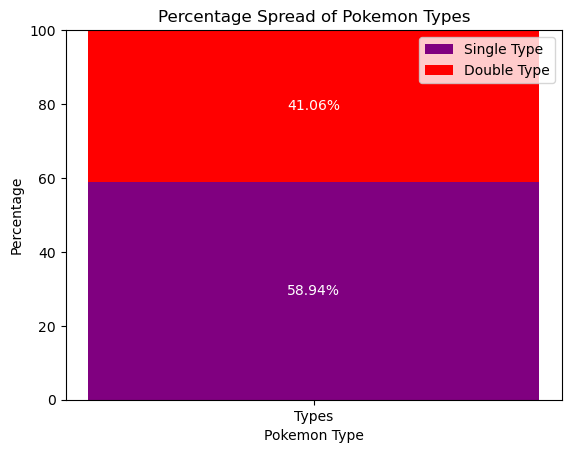

In [ ]:
# calculating the number of pokemon with 1 type and 2 types
type_counts = pokemon_stats['Types'].value_counts()

# calculating the percentages
total_pokemon = type_counts.sum()
single_type_pct = (type_counts[1] / total_pokemon) * 100
double_type_pct = (type_counts[2] / total_pokemon) * 100

# setting colors for the stacked bars
colors = ['purple', 'red']

# creating a stacked bar plot
bar1 = plt.bar(['Types'], [single_type_pct], color=colors[0])
bar2 = plt.bar(['Types'], [double_type_pct], bottom=[single_type_pct], color=colors[1])

# adding percentage text lables in the bars
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height / 2, f'{height:.2f}%', ha='center', va='center', color='white')

for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, single_type_pct + height / 2, f'{height:.2f}%', ha='center', va='center', color='white')

# plotting
plt.xlabel('Pokemon Type')
plt.ylabel('Percentage')
plt.title('Percentage Spread of Pokemon Types')
plt.ylim(0, 100)
plt.legend(['Single Type', 'Double Type'])
plt.show()

### Scatter Plot of Height and Weight

/tmp/ipykernel_32/3989510814.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(pokemon_stats['Height(m)'], pokemon_stats['Weight(kg)'], cmap='rainbow')


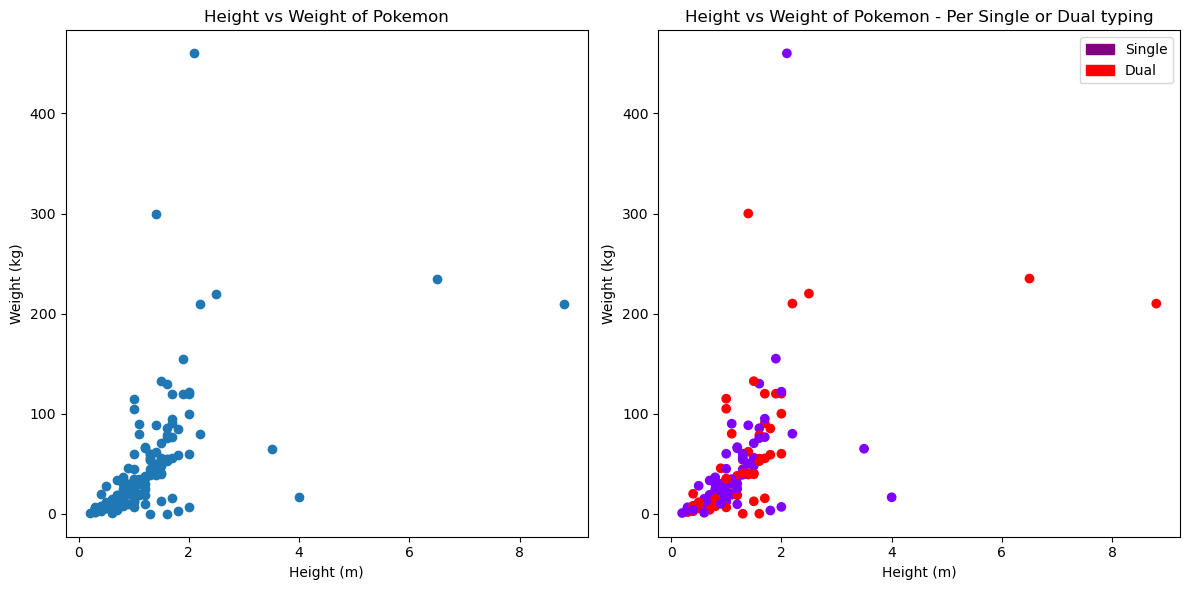

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# general scatter
ax1.scatter(pokemon_stats['Height(m)'], pokemon_stats['Weight(kg)'], cmap='rainbow')
ax1.set_xlabel('Height (m)')
ax1.set_ylabel('Weight (kg)')
ax1.set_title('Height vs Weight of Pokemon')

# scatter per typing(single or double)
scatter = ax2.scatter(pokemon_stats['Height(m)'], pokemon_stats['Weight(kg)'], c=pokemon_stats['Types'], cmap='rainbow')
ax2.set_xlabel('Height (m)')
ax2.set_ylabel('Weight (kg)')
ax2.set_title('Height vs Weight of Pokemon - Per Single or Dual typing')

# creating custom color legend
single = mpatches.Patch(color='purple', label='Single')
dual = mpatches.Patch(color='red', label='Dual')
ax2.legend(handles=[single, dual], loc='upper right')

# showing the plots
plt.tight_layout()
plt.show()

### Box Plot of Base Total by Single or Dual type

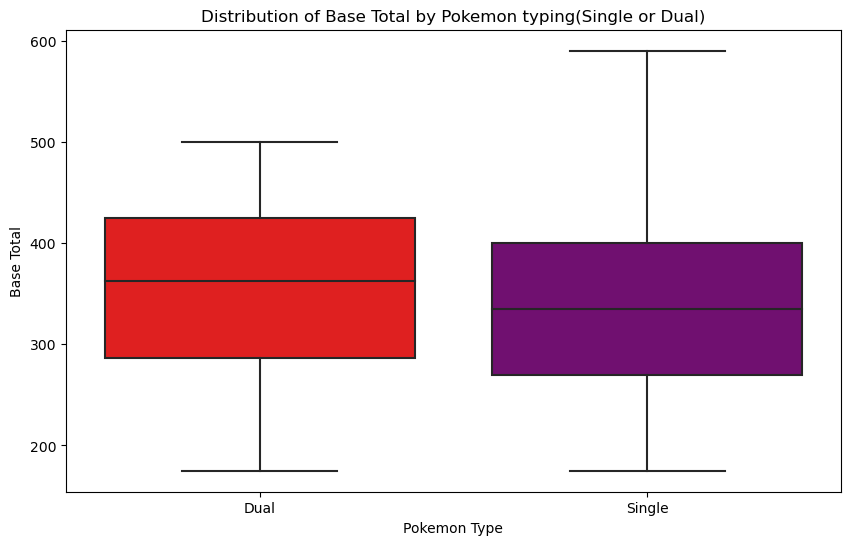

In [ ]:
# mapping 1 and 2 to single and double
pokemon_stats['Types'] = pokemon_stats['Types'].replace({1: 'Single', 2: 'Dual'})

# coloring the typing
colors = {'Single': 'purple', 'Dual': 'red'}

# plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Types', y='Base_Total', data=pokemon_stats, palette=colors)
plt.xlabel('Pokemon Type')
plt.ylabel('Base Total')
plt.title('Distribution of Base Total by Pokemon typing(Single or Dual)')
plt.show()

### Bar Plot of Pokemon Primary Types

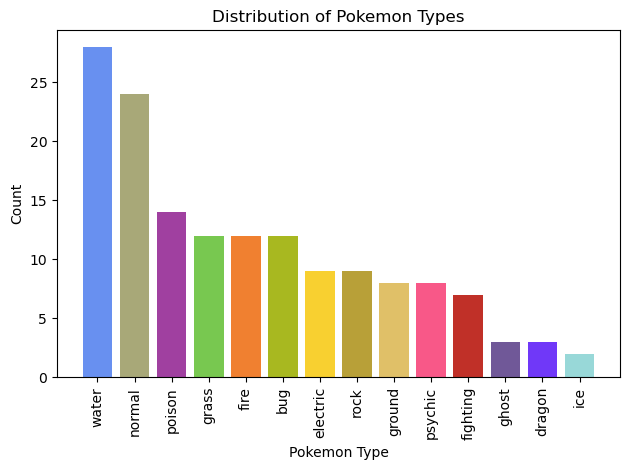

In [ ]:
# getting the count of the occurrences of each pokemon type
type_counts = pokemon_stats['Type1'].value_counts()

# setting custom coloring per type
colors = {
    'normal': '#A8A878',
    'fire': '#F08030',
    'water': '#6890F0',
    'electric': '#F8D030',
    'grass': '#78C850',
    'ice': '#98D8D8',
    'fighting': '#C03028',
    'poison': '#A040A0',
    'ground': '#E0C068',
    'flying': '#A890F0',
    'psychic': '#F85888',
    'bug': '#A8B820',
    'rock': '#B8A038',
    'ghost': '#705898',
    'dragon': '#7038F8'
}

# creating a bar plot
plt.bar(type_counts.index, type_counts.values, color=[colors[t] for t in type_counts.index])

# plotting
plt.xticks(rotation=90)
plt.xlabel('Pokemon Type')
plt.ylabel('Count')
plt.title('Distribution of Pokemon Types')
plt.tight_layout()
plt.show()

### Box Plot of Base Total by Primary Type

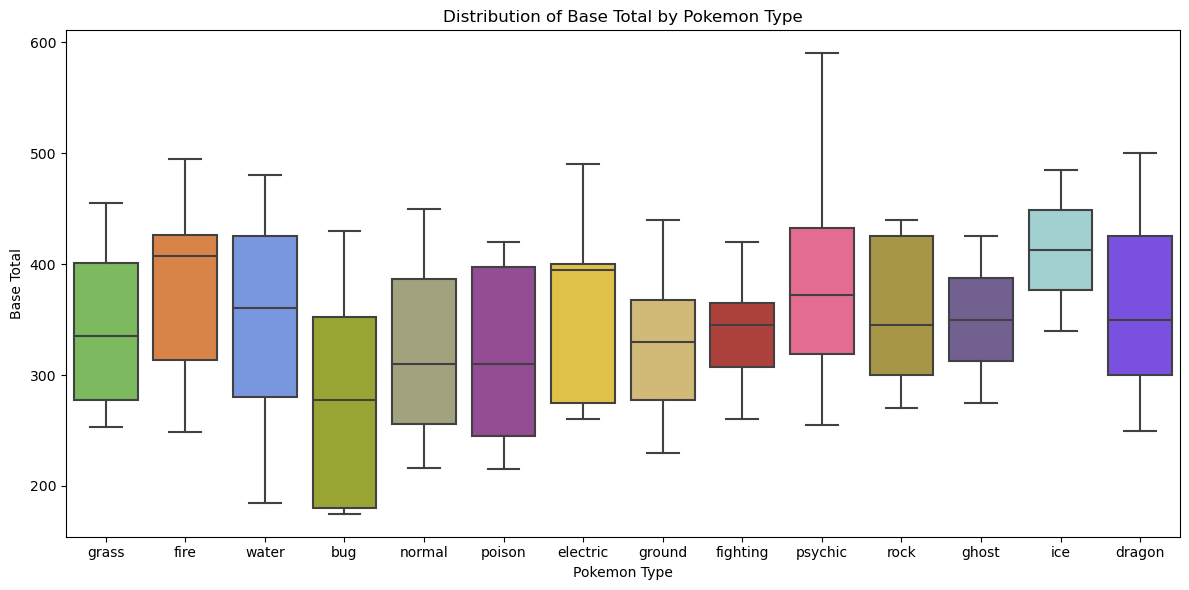

In [ ]:
# setting the color palette
colors = {
    'normal': '#A8A878',
    'fire': '#F08030',
    'water': '#6890F0',
    'electric': '#F8D030',
    'grass': '#78C850',
    'ice': '#98D8D8',
    'fighting': '#C03028',
    'poison': '#A040A0',
    'ground': '#E0C068',
    'flying': '#A890F0',
    'psychic': '#F85888',
    'bug': '#A8B820',
    'rock': '#B8A038',
    'ghost': '#705898',
    'dragon': '#7038F8'
}

# creating a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type1', y='Base_Total', data=pokemon_stats, palette=colors)
plt.xlabel('Pokemon Type')
plt.ylabel('Base Total')
plt.title('Distribution of Base Total by Pokemon Type')
plt.tight_layout()
plt.show()

### Stacked Bar Plot of Gender Percentage per primary type

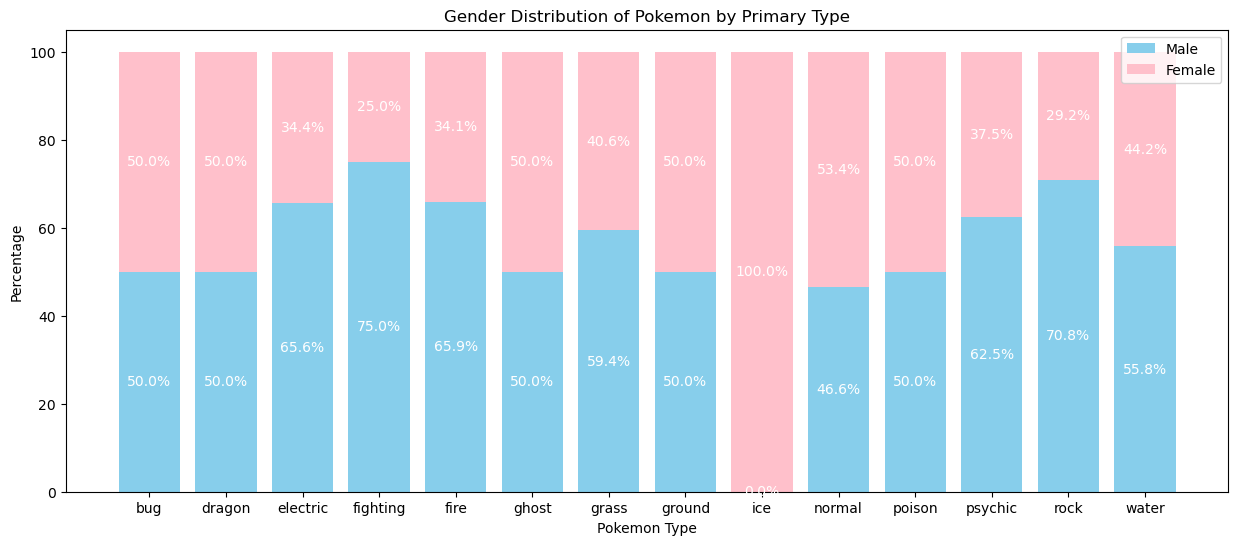

In [ ]:
# grouping by type and summing getting the percentage
type_counts = pokemon_stats.groupby('Type1')[['Male_Pct', 'Female_Pct']].sum()

# calculating the total number of pokemon per type
type_totals = type_counts.sum(axis=1)

# calculating the percentages
type_percentages = type_counts.divide(type_totals, axis=0) * 100

# creating a stacked bar plot
plt.figure(figsize=(15, 6))
plt.bar(type_percentages.index, type_percentages['Male_Pct'], label='Male', color='skyblue')
plt.bar(type_percentages.index, type_percentages['Female_Pct'], bottom=type_percentages['Male_Pct'], label='Female', color='pink')
plt.xlabel('Pokemon Type')
plt.ylabel('Percentage')
plt.title('Gender Distribution of Pokemon by Primary Type')
plt.legend()

# adding percentage labels using for loop
for index, row in type_percentages.iterrows():
    male_pct = row['Male_Pct']
    female_pct = row['Female_Pct']
    total_pct = male_pct + female_pct
    plt.text(index, male_pct / 2, f'{male_pct:.1f}%', ha='center', va='center', color='white')
    plt.text(index, male_pct + female_pct / 2, f'{female_pct:.1f}%', ha='center', va='center', color='white')

plt.show()

### Histogram of Capture Rate

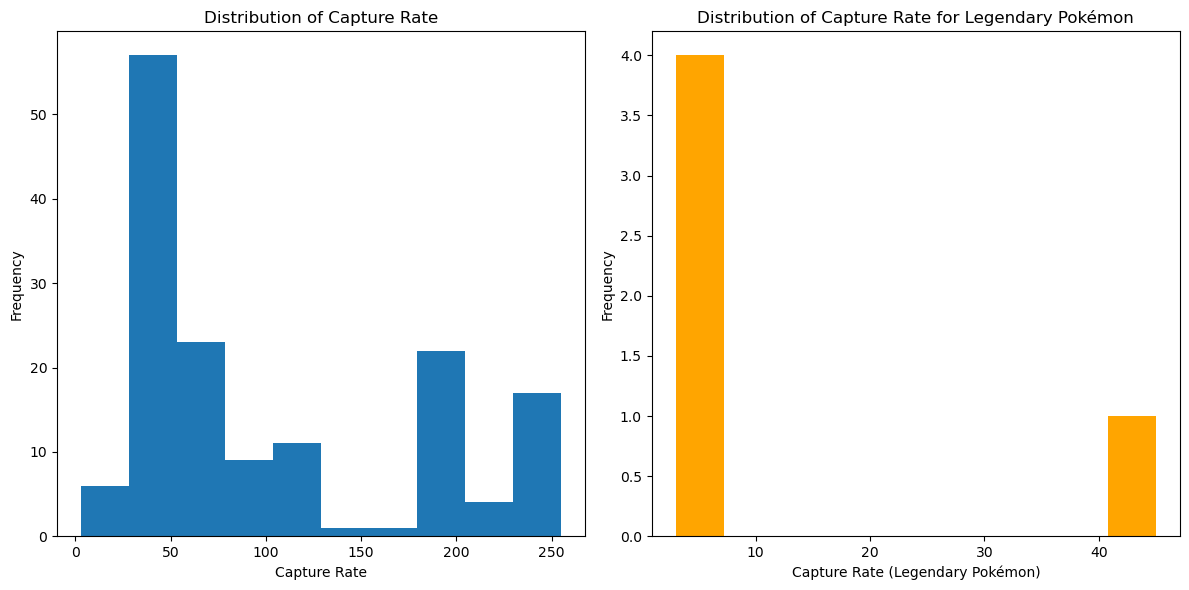

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# making a histogram for all the pokemon
ax1.hist(pokemon_stats['Capt_Rate'], bins=10)
ax1.set_xlabel('Capture Rate')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Capture Rate')

# making the histogram to feature only legendary pokemon
legendary_capt_rate = pokemon_stats[pokemon_stats['Legendary'] == 1]['Capt_Rate']
ax2.hist(legendary_capt_rate, bins=10, color='orange')
ax2.set_xlabel('Capture Rate (Legendary Pokémon)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Capture Rate for Legendary Pokémon')

# showing the plots
plt.tight_layout()
plt.show()

## 📦 Data provisioning

In [6]:
size = 256

def load_image(file, size):
    img = Image.open(file)
    img = img.convert('RGB')
    img = img.resize((size, size))
    return np.array(img).flatten()

def load_labelled_images(path, size):
    labels = []
    files = []

    for file_info in pathlib.Path(path).glob("**/*"):
        if file_info.suffix.lower() in Image.registered_extensions():
            labels.append(file_info.parts[1])
            files.append(str(file_info))

    imgs = np.array([load_image(f, size) for f in files])
    return imgs, np.array(labels)

images, labels = load_labelled_images("./pokemon", size)
print("Loaded", len(images), "images in the following", len(np.unique(labels)), "classes:")
for label in np.unique(labels):
    print(label)

C:\Users\User\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loaded 17261 images in the following 143 classes:
Abra
Aerodactyl
Alakazam
Arbok
Arcanine
Articuno
Beedrill
Bellsprout
Blastoise
Bulbasaur
Butterfree
Caterpie
Chansey
Charizard
Charmander
Charmeleon
Clefable
Clefairy
Cloyster
Cubone
Dewgong
Diglett
Ditto
Dodrio
Doduo
Dragonair
Dragonite
Dratini
Drowzee
Dugtrio
Eevee
Ekans
Electabuzz
Electrode
Exeggcute
Exeggutor
Farfetchd
Fearow
Flareon
Gastly
Gengar
Geodude
Gloom
Golbat
Goldeen
Golduck
Graveler
Grimer
Growlithe
Gyarados
Haunter
Hitmonchan
Hitmonlee
Horsea
Hypno
Ivysaur
Jigglypuff
Jolteon
Jynx
Kabutops
Kadabra
Kakuna
Kangaskhan
Kingler
Koffing
Lapras
Lickitung
Machamp
Machoke
Machop
Magikarp
Magmar
Magnemite
Magneton
Mankey
Marowak
Meowth
Metapod
Mew
Mewtwo
Moltres
Mr. Mime
MrMime
Nidoking
Nidoqueen
Nidorina
Nidorino
Ninetales
Oddish
Omanyte
Omastar
Parasect
Pidgeot
Pidgeotto
Pidgey
Pikachu
Pinsir
Poliwag
Poliwhirl
Poliwrath
Ponyta
Porygon
Primeape
Psyduck
Raichu
Rapidash
Raticate
Rattata
Rhydon
Rhyhorn
Sandshrew
Sandslash
Scyther
Sead

## 📃 Sampling the data
To get an impression of the data, here a sample from the loaded images is plotted so see if they we loaded correctly.The parameter `sample_size` can be increased if more images should be shown.

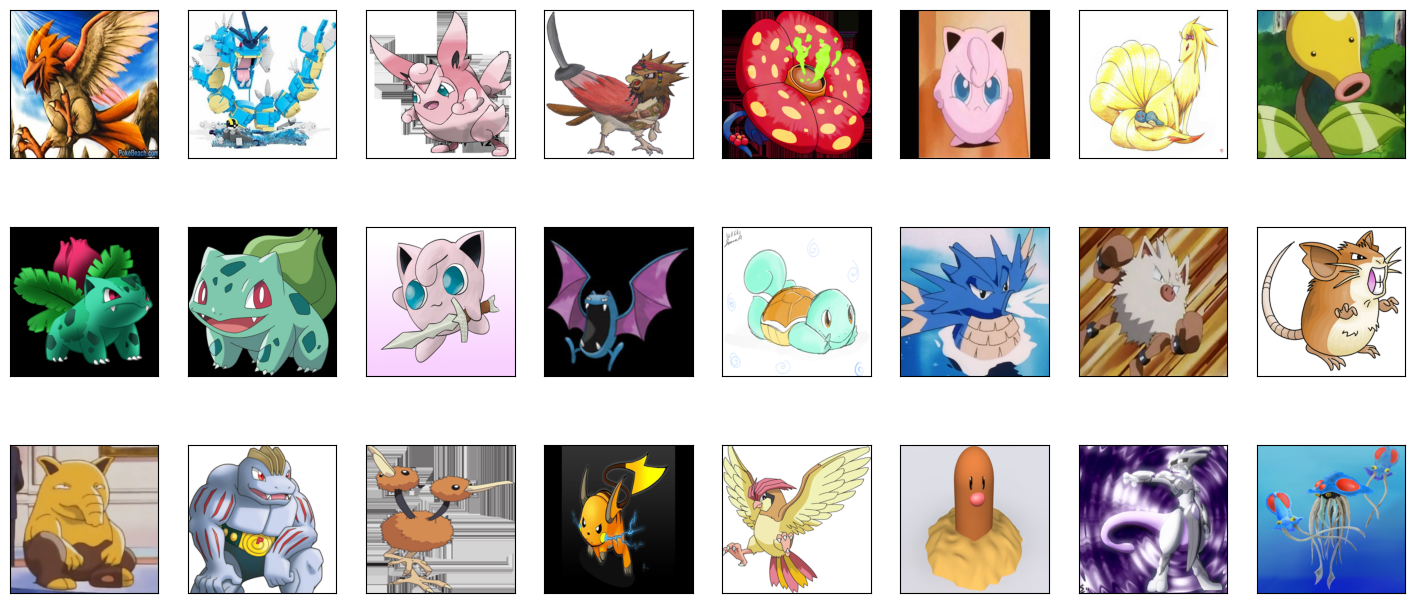

In [ ]:
sample_size = 24

plotimgs = copy.deepcopy(images)
np.random.shuffle(plotimgs)
rows = plotimgs[:sample_size]

_, subplots = plt.subplots(nrows = math.ceil(sample_size/8), ncols = 8, figsize=(18, int(sample_size/3)))
subplots = subplots.flatten()
for i, x in enumerate(rows):
    subplots[i].imshow(np.reshape(x, [size, size, 3]))
    subplots[i].set_xticks([])
    subplots[i].set_yticks([])

## 🛠️ Preprocessing

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# preprocessing
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(np.unique(labels))

## 🪓 Splitting into train/test

In [ ]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## 🧬 Modelling

In [ ]:
# creating the CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(size, size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

x_train = np.reshape(x_train, (-1, size, size, 3))
x_test = np.reshape(x_test, (-1, size, size, 3))

# compiling
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# training
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
432/432 [==============================] - 1068s 2s/step - loss: 10.6139 - accuracy: 0.0178 - val_loss: 4.9235 - val_accuracy: 0.0223
Epoch 2/10
432/432 [==============================] - 1113s 3s/step - loss: 4.6167 - accuracy: 0.0637 - val_loss: 4.7634 - val_accuracy: 0.0544
Epoch 3/10
432/432 [==============================] - 1110s 3s/step - loss: 4.0437 - accuracy: 0.1535 - val_loss: 4.7091 - val_accuracy: 0.0770
Epoch 4/10
432/432 [==============================] - 1117s 3s/step - loss: 3.3072 - accuracy: 0.2866 - val_loss: 4.9131 - val_accuracy: 0.1063
Epoch 5/10
432/432 [==============================] - 1091s 3s/step - loss: 2.5916 - accuracy: 0.4292 - val_loss: 5.5862 - val_accuracy: 0.1158
Epoch 6/10
432/432 [==============================] - 1091s 3s/step - loss: 1.9529 - accuracy: 0.5676 - val_loss: 7.0759 - val_accuracy: 0.1271
Epoch 7/10
432/432 [==============================] - 1097s 3s/step - loss: 1.6356 - accuracy: 0.6457 - val_loss: 8.0287 - val_accuracy

## 🔬 Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=32)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

108/108 [==============================] - 69s 635ms/step - loss: 10.7655 - accuracy: 0.1532
Test Loss: 10.765542030334473
Test Accuracy: 0.15320011973381042


# Trying to imrpove accuracy

In [ ]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data provisioning
size = 256

def load_image(file, size):
    img = Image.open(file)
    img = img.convert('RGB')
    img = img.resize((size, size))
    return np.array(img).flatten()

def load_labelled_images(path, size):
    labels = []
    files = []

    for file_info in pathlib.Path(path).glob("**/*"):
        if file_info.suffix.lower() in Image.registered_extensions():
            labels.append(file_info.parts[1])
            files.append(str(file_info))

    imgs = np.array([load_image(f, size) for f in files])
    return imgs, np.array(labels)

images, labels = load_labelled_images("./pokemon", size)
print("Loaded", len(images), "images in the following", len(np.unique(labels)), "classes:")
for label in np.unique(labels):
    print(label)

# Preprocessing
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(np.unique(labels))

# Splitting into train/test
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

x_train = x_train.reshape(-1, size, size, 3)
x_test = x_test.reshape(-1, size, size, 3)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)

# Modelling
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(size, size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

# Compiling
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=256, validation_data=(x_test, y_test))

# Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=32)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Loaded 17201 images in the following 142 classes:
Abra
Aerodactyl
Alakazam
Arbok
Arcanine
Articuno
Beedrill
Bellsprout
Blastoise
Bulbasaur
Butterfree
Caterpie
Chansey
Charizard
Charmander
Charmeleon
Clefable
Clefairy
Cloyster
Cubone
Dewgong
Diglett
Ditto
Dodrio
Doduo
Dragonair
Dragonite
Dratini
Drowzee
Dugtrio
Eevee
Ekans
Electabuzz
Electrode
Exeggcute
Exeggutor
Farfetchd
Fearow
Flareon
Gastly
Gengar
Geodude
Gloom
Golbat
Goldeen
Golduck
Graveler
Grimer
Growlithe
Gyarados
Haunter
Hitmonchan
Hitmonlee
Horsea
Hypno
Ivysaur
Jigglypuff
Jolteon
Jynx
Kabutops
Kadabra
Kakuna
Kangaskhan
Kingler
Koffing
Lapras
Lickitung
Machamp
Machoke
Machop
Magikarp
Magmar
Magnemite
Magneton
Mankey
Marowak
Meowth
Metapod
Mew
Mewtwo
Moltres
MrMime
Nidoking
Nidoqueen
Nidorina
Nidorino
Ninetales
Oddish
Omanyte
Omastar
Parasect
Pidgeot
Pidgeotto
Pidgey
Pikachu
Pinsir
Poliwag
Poliwhirl
Poliwrath
Ponyta
Porygon
Primeape
Psyduck
Raichu
Rapidash
Raticate
Rattata
Rhydon
Rhyhorn
Sandshrew
Sandslash
Scyther
Seadra
Seakin

# Guessing the type

## 🛠️ Preprocessing

In [10]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Preprocess the labels
y = pokemon_stats['Type1']

# Map each pokemon name to its type
pokemon_name_mapping = dict(zip(pokemon_stats['Name'], y))

# Set the path for the images
image_folder = 'pokemon'

# Declare the lists to store the data
X = []
labels = []

# Iterating over each pokemon folder
for folder_name in os.listdir(image_folder):
    folder_path = os.path.join(image_folder, folder_name)
    if os.path.isdir(folder_path):
        # Iterating over each image per folder
        for file_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file_name)
            try:
                # Load and preprocess the image
                image = load_img(image_path, target_size=(256, 256))
                image_array = img_to_array(image) / 255.0
                X.append(image_array)

                # Getting the pokemon name from the image folder name
                pokemon_name = folder_name.replace('_', ' ')
                if pokemon_name in pokemon_name_mapping:
                    labels.append(pokemon_name_mapping[pokemon_name])
            except Exception as e:
                print(f"Error processing image: {image_path}. Error: {str(e)}")

# Convert lists to numpy arrays
X = np.array(X)
labels = np.array(labels)

Error processing image: pokemon\Abra\desktop.ini. Error: cannot identify image file <_io.BytesIO object at 0x000002C8B78139C0>
Error processing image: pokemon\Tentacruel\d6fb0a3046364ea2b49525c6f6b966e5.svg. Error: cannot identify image file <_io.BytesIO object at 0x000002C8B78139C0>


# Train test

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# label encoding

In [12]:
# Perform label encoding on the target variable
unique_labels = np.unique(labels)
num_classes = len(unique_labels)
label_mapping = {label: i for i, label in enumerate(unique_labels)}
y_train_encoded = np.array([label_mapping[label] for label in y_train])
y_test_encoded = np.array([label_mapping[label] for label in y_test])

## 🧬 Modelling

In [15]:
# Creating the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(num_classes, activation='softmax'))

# Compiling
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Training
model.fit(X_train, y_train_encoded, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
344/344 [==============================] - 241s 698ms/step - loss: 2.2535 - accuracy: 0.3052 - val_loss: 1.8325 - val_accuracy: 0.4400
Epoch 2/30
344/344 [==============================] - 241s 700ms/step - loss: 1.7974 - accuracy: 0.4247 - val_loss: 1.6386 - val_accuracy: 0.4717
Epoch 3/30
344/344 [==============================] - 242s 703ms/step - loss: 1.4533 - accuracy: 0.5187 - val_loss: 1.4609 - val_accuracy: 0.5436
Epoch 4/30
344/344 [==============================] - 240s 699ms/step - loss: 1.1660 - accuracy: 0.6113 - val_loss: 1.3745 - val_accuracy: 0.5738
Epoch 5/30
344/344 [==============================] - 240s 699ms/step - loss: 0.9223 - accuracy: 0.6892 - val_loss: 1.4503 - val_accuracy: 0.5730
Epoch 6/30
344/344 [==============================] - 248s 722ms/step - loss: 0.8038 - accuracy: 0.7192 - val_loss: 1.4499 - val_accuracy: 0.5818


## 🔬 Evaluation

In [16]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

108/108 [==============================] - 15s 142ms/step - loss: 1.3337 - accuracy: 0.5873
Test Loss: 1.3336763381958008
Test Accuracy: 0.5873292684555054


# Evalaute on specific image

In [ ]:
# Evaluate a specific image
def evaluate_image(image_path):
    # Load and preprocess the image
    image = load_img(image_path, target_size=(256, 256))
    image_array = img_to_array(image) / 255.0

    # Reshape the image array to match the input shape of the model
    image_array = np.expand_dims(image_array, axis=0)

    # Predict using the model
    predictions = model.predict(image_array)

    # Getting the predicted label
    predicted_label = unique_labels[np.argmax(predictions)]

    # Printing the result
    print(f"Image: {image_path}")
    print(f"Predicted Type: {predicted_label}")

# Evaluate a specific image
image_path = './pokemon/Slowbro/00000000.png'
evaluate_image(image_path)

# Saving the model

In [17]:
model.save('guess_type.h5')